## Chi-Square Test-
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [2]:
import scipy.stats as stats

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
dataset=sns.load_dataset('tips')

In [4]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Observation 
the data set about how frequently people are visting the restuarent and at the same time how much bill there are paying for there either luch or dinner and here size means how many people visited the restaurent

By using the sample population  and  with the help of chi-square Test iam going to find the relationship or association between 2 categorical features which are Sex and smoker 

In [5]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker']) # The crosstab() function in Python is a library function in the Pandas library. It is used to compute a simple cross tabulation of two (or more) factors. A cross tabulation is a table that shows the frequencies of different combinations of categorical variables.and crosstab form a matrix which look like in the below output
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [6]:
dataset_table.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [8]:
 # observed values
observed_values=dataset_table.values
print("observed_values \n",observed_values)

observed_values 
 [[60 97]
 [33 54]]


In [10]:
val=stats.chi2_contingency(dataset_table)

In [11]:
val

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

 The code you shared shows how to use the chi2_contingency() function in Python to perform a chi-square test of independence. The chi-square test of independence is a statistical test that is used to determine whether there is a significant relationship between two categorical variables.

In your example, the two categorical variables are the rows and columns of the observed_values array. The rows represent the different categories of one variable, and the columns represent the different categories of the other variable.

The chi2_contingency() function takes the observed_values array as input and returns a tuple of four values:

The chi-square statistic. This is a measure of the difference between the observed and expected frequencies.
The p-value. This is the probability of obtaining the observed results if there is no relationship between the two variables. A p-value of less than 0.05 is generally considered to be statistically significant.
The degrees of freedom. This is a measure of the number of independent cells in the contingency table.
The expected frequencies. These are the frequencies that would be expected if there was no relationship between the two variables.
In your output, the chi-square statistic is 0.0, the p-value is 1.0, the degrees of freedom is 1, and the expected frequencies are shown in the array.

Since the p-value is 1.0, we cannot reject the null hypothesis that there is no relationship between the two variables. In other words, the observed frequencies are not significantly different from the expected frequencies.

To put it more briefly, the chi-square test of independence found no statistically significant relationship between the two categorical variables in your example.

In [12]:
Expected_values=val[3]

In [13]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of freedom :-",ddof)
alpha=0.05 # it is also know as p value or i can say this is a learning rate, so if we set p value as 0.05 then it means 95% of the variance ratio is captured between those 2 features 

Degree of freedom :- 1


Sure. The code you shared calculates the degrees of freedom for a chi-square test. The degrees of freedom is a measure of the number of independent cells in the contingency table. In your example, the contingency table has 2 rows and 2 columns, so there are (2-1)*(2-1) = 1 degree of freedom.

The degrees of freedom is used to determine the critical value for the chi-square test. The critical value is the value of the chi-square statistic that is required to reject the null hypothesis. The null hypothesis is the hypothesis that there is no relationship between the two categorical variables.

In your example, the alpha level is set to 0.05. This means that we are setting the probability of making a Type I error (rejecting the null hypothesis when it is true) to 5%. The critical value for a chi-square test with 1 degree of freedom and an alpha level of 0.05 is 3.841.

Since the calculated chi-square statistic (0.0) is less than the critical value (3.841), we cannot reject the null hypothesis. In other words, there is not enough evidence to conclude that there is a significant relationship between the two categorical variables.

To put it more briefly, the degrees of freedom is a measure of the number of independent cells in the contingency table. It is used to determine the critical value for the chi-square test, which is used to determine whether to reject the null hypothesis.


### Chi_square Formula

x^2=summation((o-e)^2)/e)

In [16]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,Expected_values)])
chi_square_statistics=chi_square[0]+chi_square[1]

The first line imports the chi2 function from the scipy.stats library. This function is used to calculate the chi-square statistic.

The second line calculates the chi-square statistic. The sum() function sums the squared differences between the observed and expected frequencies, divided by the expected frequencies. The zip() function zips together the observed and expected frequencies, so that they can be looped over together.

The third line calculates the chi-square statistic for the entire contingency table. This is done by adding the chi-square statistics for each row of the contingency table.

In [18]:
print("chi_square statistic :-",chi_square_statistics)

chi_square statistic :- 0.001934818536627623


In [19]:
critical_value=chi2.ppf(q=1-alpha,df=ddof) #ppf=percent point fucntion,alpha=p
print('critical_value:',critical_value)

critical_value: 3.841458820694124


The above lines calculates the critical value for the chi-square test. The chi2.ppf() function calculates the percent point function for the chi-square distribution. The q argument specifies the quantile, which in this case is 1-alpha. The df argument specifies the degrees of freedom.



In [20]:
# p-value
p_value=1-chi2.cdf(x=chi_square_statistics,df=ddof)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


The above lines calculates the p-value for the chi-square test. The chi2.cdf() function calculates the cumulative distribution function for the chi-square distribution. The x argument specifies the value of the chi-square statistic. The df argument specifies the degrees of freedom.

In [22]:
if chi_square_statistics>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


The above lines print the significance level, degrees of freedom, and p-value for the chi-square test. The eighth and ninth lines print a decision on whether to reject the null hypothesis.

The null hypothesis is the hypothesis that there is no relationship between the two categorical variables. If the chi-square statistic is greater than the critical value or the p-value is less than alpha, then we reject the null hypothesis. In other words, we conclude that there is a significant relationship between the two categorical variables.

In your example, the chi-square statistic is less than the critical value and the p-value is greater than alpha. Therefore, we cannot reject the null hypothesis. In other words, there is not enough evidence to conclude that there is a significant relationship between the two categorical variables.

- sex and smoker features are inter related or associated so i may consider the both categorical features which are sex and smoker for feature selection or feature engineering stage 

- so we got output after performing the chi2 test as there is no relationship between 2 features which are sex and smoker it means there are independent to each other so defintely these both features are imp to trigger the output it means those features helps us to improve our model accuracy   

### T-Test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

or

suppose i have 2 groups these 2 groups may be population now if i take the sample of 2 population and if i try to compare the mean and come to conclusion that wether there a significant difference between the 2 population by just considering the mean from that population

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

### One -sample T-test with Python
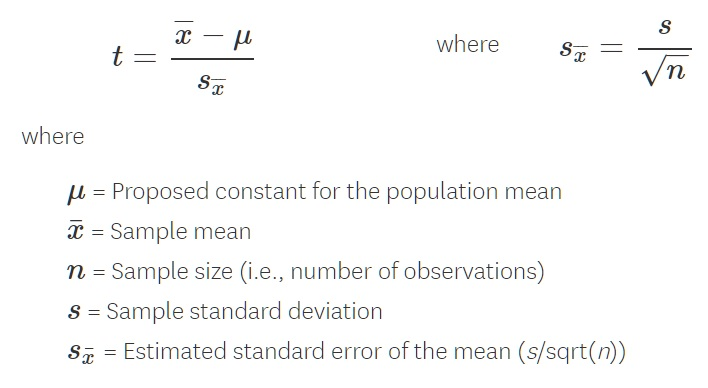

iam going to consider a class of students and there are 32 students are there  and the mean of class of a students is 30.3 w.r.t their age

and if i consider a sample of ages from these and if i compute a mean is there any siginficant difference  in mean of the population  thats all i want to see or check and its all done one sample T-test

so if we are performing the t-test  we are basically comparing the population and sample and we are validating something based on evidences now in this case my validation is whether there is difference between a sample mean and population mean and here i will create a alternate hypothisis and which is H1 and this alternate hypothisis says that there is differnece and null hypothisis (H0) say that there is no difference 

so i use this t-test to compute the p value so if the p value is  less than 0.0.5 iam going to reject the null hypothesis and then iam going to say that yes ther is some change in difference of sample mean and population mean

In [25]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [26]:
len(ages)

32

In [27]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [28]:
# lets take the sample
sample_size=10
age_sample=np.random.choice(ages,sample_size) # here iam going to pick up the 10 ages randomly in the age varaible

In [29]:
age_sample

array([30, 43, 55, 28, 18, 17, 18, 16, 17, 55])

In [30]:
from scipy.stats import ttest_1samp # ttest_1samp is going to use whenever we are going to perform the one_sample t-test

In [ ]:
ttest,p_value=ttest_1samp(age_sample,30) 

here we are getting the 2 values which are p_value and ttest but for now p_value is imp and perfoming the onesampe t-test by using ttest_1samp() by just passing the age sample ,30 which means whether my age_sample is based on the population mean which is 30 and i just consider the population mean value as 30 and null hypothesis is basically saying that whether the value is going to be 30 which iam considering as population_mean or whether it is not 30  , if it is 30 we say that there is no difference and i consider this as null hypothesis (H0) AND my alternate hypothesis (H1) is there is a difference  

In [31]:
print(p_value)

0.964915107315732


if my p value is less than 0.05 then we are rejecting null hypothesis and if it is greater than 0.05 then we are accepting null hypothesis

In [33]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


A one-sample t-test is used to test whether the mean of a sample is equal to a hypothesized mean.

In your example, the hypothesized mean is 30. The sample mean is calculated to be 30.34375. The p-value is 0.9649, which is greater than the significance level of 0.05. Therefore, we accept the null hypothesis, which means that there is no significant difference between the mean of the sample and the hypothesized mean.

In other words, the sample mean is not significantly different from 30.

## Some More Examples
Consider the age of students in a college and in Class A

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500) # loc =18 means the age starts selects from 18 and mu=35 means all the ages which are randomly get selected has mean 35 and iam considering the 1500 students  
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [5]:
classA_ages.mean()

46.9

In [13]:
# now again iam using the ttest_1sample to find whether the mean of the classA_ages sample is different from the school_ages
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean()) #here iam taking the population mean as school_ages varaible ,and remember my 1st parameter which is a given as sample of ages and 2nd paramter which is mean of my population 

In [14]:
p_value

1.139027071016194e-13

here we got p_value as 1.13 which is less than 0.05  and so we are rejecting the null hypothesis

In [15]:
school_ages.mean()

53.303333333333335

In [16]:
if p_value<0.05: # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are rejecting null hypothesis


p_value is 1.13 which is less than 0.05  and so we are rejecting the null hypothesis and null hypothesis is saying that there is no difference in the mean of the age and alternate hypothesis is saying that there is difference in the mean of the age 



Certainly! Let's go through the code step by step:

1. Imports: The code begins by importing the necessary libraries, including NumPy, Pandas, and scipy.stats. These libraries provide functions for statistical calculations and data manipulation.

2. Setting the random seed: The line `np.random.seed(6)` sets a random seed of 6 for reproducibility. This ensures that the random numbers generated will be the same each time the code is executed.

3. Generating random data: Two sets of random data are generated using the Poisson distribution. The `school_ages` variable represents the ages of 1500 students, with a mean of 35 and a starting point of 18. The `classA_ages` variable represents the ages of 60 students in a specific class, with a mean of 30 and the same starting point of 18.

4. Calculating the mean: The line `classA_ages.mean()` calculates the mean of the `classA_ages` sample, which is found to be approximately 46.9.

5. Performing a one-sample t-test: The `stats.ttest_1samp()` function is used to perform a one-sample t-test. This test compares the mean of the `classA_ages` sample to the mean of the `school_ages` population. The result is stored in the variables `_` and `p_value`.

6. Printing the p-value: The line `p_value` prints the p-value obtained from the t-test. In this case, the p-value is approximately 1.14e-13 (very close to zero).

7. Comparing p-value with significance level: The code then checks whether the p-value is less than 0.05 (a significance level of 5%). If the p-value is less than the significance level, it prints "we are rejecting the null hypothesis." Otherwise, it prints "we are accepting the null hypothesis."

8. Printing the mean of `school_ages`: The line `school_ages.mean()` calculates and prints the mean of the `school_ages` population, which is approximately 53.3.

In summary, this code generates random age data for students, calculates the mean of a specific class's ages, performs a one-sample t-test to compare it with the mean of the entire school's ages, and determines whether to reject or accept the null hypothesis based on the p-value.

##### Question
By performing the ttest -sample why we are getting to know whether to accept null hypothesis or not explain me very clearlyt

#### Answer
Certainly! Let's dive into the details of the t-test and how it helps us determine whether to accept or reject the null hypothesis.

In statistical hypothesis testing, we have a null hypothesis (H0) and an alternative hypothesis (HA). The null hypothesis represents the assumption of no significant difference or no effect, while the alternative hypothesis suggests that there is a significant difference or effect.

In the given code, the null hypothesis (H0) assumes that the mean age of the specific class (classA_ages) is equal to the mean age of the entire school population (school_ages). The alternative hypothesis (HA) assumes that the means are different.

To determine whether to accept or reject the null hypothesis, we perform a t-test. The t-test assesses the statistical significance of the difference between the sample mean (classA_ages.mean()) and the population mean (school_ages.mean()).

The line of code _, p_value = stats.ttest_1samp(a=classA_ages, popmean=school_ages.mean()) calculates the t-test and stores the resulting p-value in the variable p_value. The p-value represents the probability of obtaining the observed difference (or a more extreme difference) between the sample mean and the population mean, assuming that the null hypothesis is true.

Now, we compare the obtained p-value with a predetermined significance level (also known as alpha), typically set at 0.05 or 5% in many statistical analyses.

If the p-value is less than the significance level (p-value < 0.05), we have evidence to reject the null hypothesis. This suggests that the mean age of the specific class is significantly different from the mean age of the entire school population.

On the other hand, if the p-value is greater than or equal to the significance level (p-value >= 0.05), we do not have sufficient evidence to reject the null hypothesis. In this case, we conclude that there is not enough statistical evidence to suggest a significant difference between the mean age of the specific class and the mean age of the entire school population.

In the given code, the p-value is found to be approximately 1.14e-13, which is significantly smaller than the significance level of 0.05. Therefore, the code prints "we are rejecting the null hypothesis," indicating that there is strong evidence to suggest a significant difference between the mean ages of the specific class and the entire school population.

In summary, by performing the one-sample t-test and comparing the p-value with the significance level, we can infer whether to accept or reject the null hypothesis and make conclusions about the difference between the sample mean and the population mean.

#### what we will get after either to accept or reject the null hypothesis


After performing a statistical test and deciding whether to accept or reject the null hypothesis, we gain insights into the relationship or difference between the variables under investigation. Here's what we typically obtain based on the decision:

Rejecting the null hypothesis: If we reject the null hypothesis, it means we have found sufficient evidence to support the alternative hypothesis. In other words, we have evidence to suggest that there is a significant difference, effect, or relationship between the variables being tested. This can provide valuable insights and support further analysis or decision-making.

Accepting the null hypothesis: If we accept the null hypothesis, it means we do not have enough evidence to support the alternative hypothesis. We conclude that there is no significant difference, effect, or relationship between the variables. This can indicate that the observed result is likely due to chance or random variation.

It's important to note that accepting the null hypothesis does not necessarily mean that the null hypothesis is true. It simply means that we do not have enough evidence to suggest otherwise based on the statistical test conducted.

The decision to accept or reject the null hypothesis depends on the p-value obtained from the statistical test and the predetermined significance level



### Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

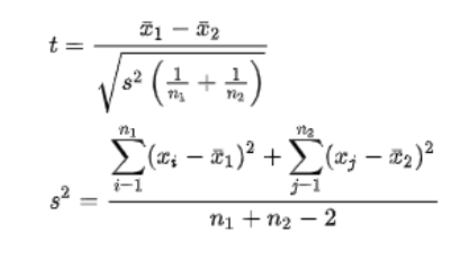

In [18]:
np.random.seed(12)
classB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
classB_ages.mean()

50.63333333333333

In [20]:
_,p_value=stats.ttest_ind(a=classA_ages,b=classB_ages,equal_var=False) # so for perfoming the 2 sample ttest we are using the function name as ttest_ind() asnd it contains paramters as a is 1 group and b is another group

In [22]:
p_value

0.00039942095100859375

In [21]:
if p_value<0.05: # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are rejecting null hypothesis


Certainly! Let's go through the code step by step to understand the two-sample t-test being performed:

Setting the random seed: The line np.random.seed(12) sets a random seed of 12 for reproducibility. This ensures that the random numbers generated will be the same each time the code is executed.

Generating random age data for class B: The line classB_ages = stats.poisson.rvs(loc=18, mu=33, size=60) generates a set of random ages for another class, class B. The ages are generated using the Poisson distribution with a mean of 33 and a starting point of 18. The classB_ages variable represents the ages of 60 students in class B.

Calculating the mean of class B ages: The line classB_ages.mean() calculates the mean of the class B ages, which is found to be approximately 50.63.

Performing a two-sample t-test: The stats.ttest_ind() function is used to perform a two-sample t-test. This test compares the means of two independent samples (class A ages and class B ages) to determine if they are significantly different. The parameters a and b are used to pass the two samples, and equal_var=False is specified to indicate that the variances of the two samples are not assumed to be equal.

Printing the p-value: The line p_value prints the p-value obtained from the two-sample t-test. In this case, the p-value is approximately 0.0004.

Comparing p-value with significance level: The code then checks whether the p-value is less than 0.05 (a significance level of 5%). If the p-value is less than the significance level, it prints "we are rejecting the null hypothesis." Otherwise, it prints "we are accepting the null hypothesis."

In this case, the p-value is found to be approximately 0.0004, which is smaller than the significance level of 0.05. Therefore, the code prints "we are rejecting the null hypothesis," indicating that there is strong evidence to suggest a significant difference between the mean ages of class A and class B.

To summarize, the code performs a two-sample t-test to compare the means of two independent samples. By comparing the resulting p-value with the significance level, we can determine whether to accept or reject the null hypothesis. In this case, the null hypothesis assumes that there is no significant difference between the mean ages of class A and class B, and we reject the null hypothesis based on the small p-value obtained.

### Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [25]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45] # here i have some weight of the school kids
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15) # so after some years the weight of the school kids got increase,so by appending adding some weights on the values and considering that the weight of those kids is increasing 

In [26]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[10.65253339 32.44523171 30.08750529 33.98201318 30.08038798 39.78974242
 25.00574593 23.0701257  19.55445346 25.06889364 23.18015951 27.94057668
 24.08765575 30.12145502 47.42956055]


so based on the above output we are checking that wether weight 1 and weight 2 have statistical difference or not, and how difference the particular samples are ,(H0) null hypothesis says that there is no statistical difference,(H1) alternate hypothesis says that there is a statistical difference ,so if we want to comput in this particular way we have to perform the paired T-test  because 2 weight features has same len of weights but the samples weight  have been changed or different

In [31]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [32]:
weight_df

,weight_10,weight_20,weight_change
0,25,10.652533,-14.347467
1,30,32.445232,2.445232
2,28,30.087505,2.087505
3,35,33.982013,-1.017987
4,28,30.080388,2.080388
5,34,39.789742,5.789742
6,26,25.005746,-0.994254
7,29,23.070126,-5.929874
8,30,19.554453,-10.445547
9,26,25.068894,-0.931106


In [33]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2) # here by using ttest_rel we are performing the paired t-test on 2 different sample weights and a= previous sample of weights and b= present sample of weights

In [34]:
print(p_value)

0.12415067833129617


In [35]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


The above output basically saying that there is no such difference b/w these particular groups  

### Correlation

In [38]:
import seaborn as sns
df=sns.load_dataset('iris')

In [39]:
df.shape

(150, 5)

In [40]:
df.corr()

C:\Users\mahen\AppData\Local\Temp\ipykernel_22344\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


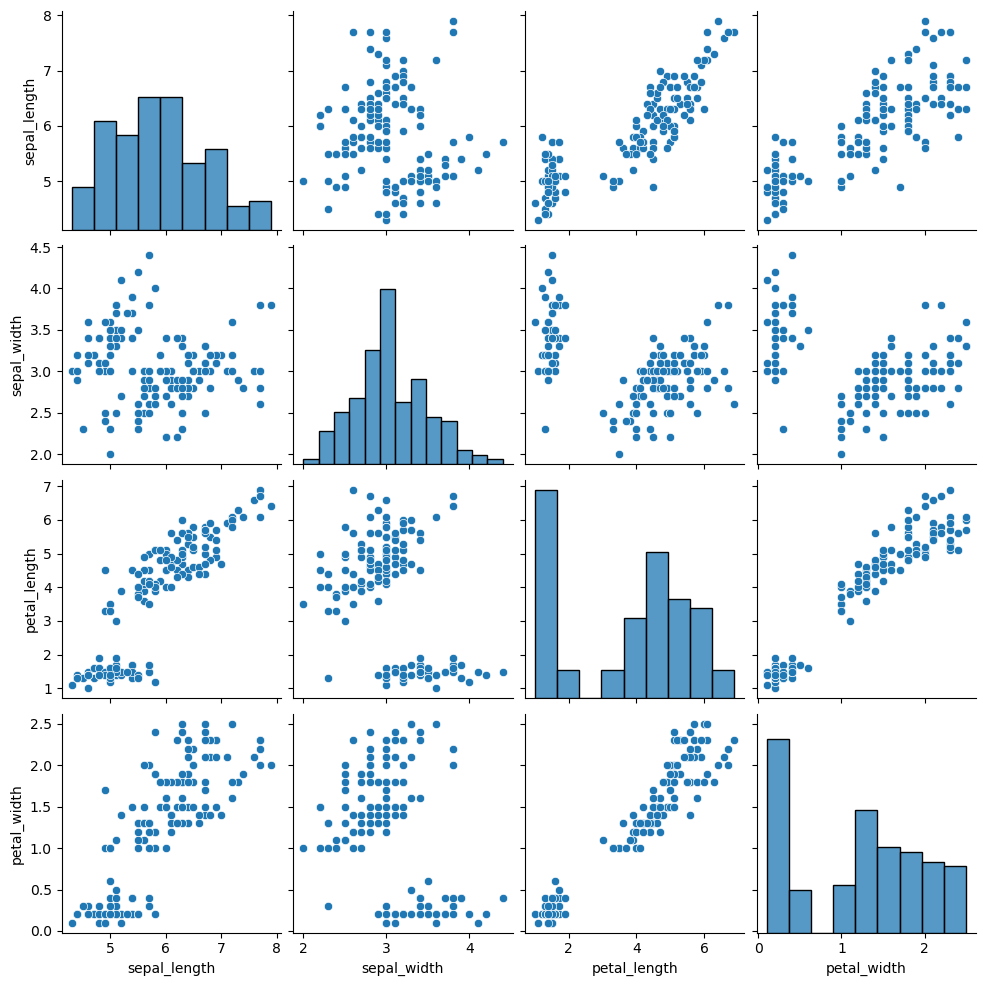

In [41]:
sns.pairplot(df)

### Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not

In [42]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [43]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df_anova = df1[['petal_width','species']]

In [45]:
grps = pd.unique(df_anova.species.values)

In [46]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [47]:
d_data={grp:df_anova['petal_width'][df_anova.species==grp] for grp in grps}

In [48]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [49]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [50]:
print(p)

4.169445839443116e-85


In [51]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


Certainly! The code you provided demonstrates the use of a one-way ANOVA test (also known as an F-test) to compare the means of three different groups (categories of iris flowers) based on their petal width. Let's go through the code step by step to understand it in detail:

Importing libraries and loading the dataset: The code begins by importing the necessary libraries, including seaborn and scipy.stats. It then loads the 'iris' dataset from seaborn using the line df1 = sns.load_dataset('iris').

Creating the dataframe for ANOVA: The line df_anova = df1[['petal_width','species']] creates a new dataframe (df_anova) that contains only the 'petal_width' and 'species' columns from the original 'iris' dataframe.

Extracting unique groups: The line grps = pd.unique(df_anova.species.values) extracts the unique group names from the 'species' column. In this case, there are three unique groups: 'setosa', 'versicolor', and 'virginica'.

Creating a dictionary of data: The code creates a dictionary called d_data to store the petal width data for each group. The line d_data={grp:df_anova['petal_width'][df_anova.species==grp] for grp in grps} uses a dictionary comprehension to iterate over each group and store the corresponding petal width data in the dictionary.

Performing the one-way ANOVA test: The line F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica']) performs the one-way ANOVA test using the f_oneway() function from scipy.stats. It compares the petal width data of the three groups ('setosa', 'versicolor', and 'virginica').

Printing the p-value: The line print(p) prints the p-value obtained from the ANOVA test. In this case, the p-value is approximately 4.169e-85.

Comparing p-value with significance level: The code then checks whether the p-value is less than 0.05 (a significance level of 5%). If the p-value is less than the significance level, it prints "reject null hypothesis." Otherwise, it prints "accept null hypothesis."

In this case, the p-value is found to be approximately 4.169e-85, which is significantly smaller than the significance level of 0.05. Therefore, the code prints "reject null hypothesis," indicating that there is strong evidence to suggest that the means of the petal widths in the three groups ('setosa', 'versicolor', and 'virginica') are significantly different.

To summarize, the code performs a one-way ANOVA test to compare the means of three different groups based on their petal width. By comparing the resulting p-value with the significance level, we can determine whether to accept or reject the null hypothesis. In this case, the null hypothesis assumes that the means of the petal widths in the groups are the same, and we reject the null hypothesis based on the small p-value obtained.

#### At what time we do perform the t-test ,chi2 test,annova test and why do we perfom these tests

Different statistical tests are performed based on the type of data and the research question at hand. Here's an overview of when and why we perform some commonly used tests:

T-test: The t-test is used to compare the means of two groups and determine if there is a significant difference between them. It is typically performed when the data follows a normal distribution and the variances of the groups are assumed to be equal (in the case of the independent samples t-test) or the data is paired (in the case of the paired samples t-test). The t-test is useful when comparing the means of two groups, such as comparing the effectiveness of two treatments or comparing the performance of two groups in an experiment.

Chi-square test: The chi-square test is used to analyze categorical data and determine if there is a significant association or difference between two or more categorical variables. It is used when the data is in the form of frequencies or counts in different categories. The chi-square test can be performed with different variations, such as the chi-square test for independence or the chi-square goodness-of-fit test. This test is useful in various scenarios, such as analyzing survey responses, examining the association between variables, or testing the goodness-of-fit of a model to observed data.

ANOVA (Analysis of Variance) test: The ANOVA test is used to compare the means of three or more groups simultaneously. It assesses whether there are significant differences among the means of multiple groups based on the variation within and between the groups. The ANOVA test is commonly used in experimental studies with more than two treatment groups or when comparing multiple levels of a categorical variable. It helps determine if there are any statistically significant differences among the means of the groups being compared.

The choice of the appropriate test depends on the nature of the data, the research question, and the assumptions associated with each test. It is important to consider the characteristics of the data and select the test that is most suitable for the specific analysis.